In [1]:
## Import packages

import sys
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import networkx as nx



# Need to have
# random sample
# np.std
# means, hists
# se using function and computing


In [43]:
## Double check we are in the correct location.

# Get working directory
os.getcwd()

# List files in our directory
os.listdir()

['LP_coordinates.mat',
 'L4_expression_uncertainty.pdf',
 'IP4DS - Intro to Pandas Solutions (1).ipynb',
 'Distribution of sample means.png',
 'L4_expression_distofsamplemeans_n1000.pdf',
 '.config',
 'region_coordinates.mat',
 'line_plot.pdf',
 'L4_expression_distofsamplemeans_n10.pdf',
 'brain_data',
 'Lecture_5_recode.ipynb',
 '.DS_Store',
 'L4_expression_distofsamplemeans_1.pdf',
 'interactive_graphs.html',
 'Individual2_scanC.mat',
 'L4_expression_sample_n10_1.pdf',
 'Dockerfile',
 'Makefile',
 '.local',
 'x_coord.mat',
 '.ipython',
 'Individual_brains.mat',
 'L4_expression_sample_n10_4.pdf',
 'L4_expression_sample_n1000_4.pdf',
 'brainPlotting.ipynb',
 'plotly_dev.ipynb',
 'test.pdf',
 'pandas_learning.ipynb',
 'L4_expression_distofsamplemeans_n100.pdf',
 'lectures_git',
 'CCLE_expression.csv',
 'plot.svg',
 'output.pdf',
 'coordinatesXYZ.mat',
 'L4_expression_distofsamplemeans.pdf',
 '.ipynb_checkpoints',
 '.jupyter',
 'L4_expression_sample_n100_2.pdf',
 'DepMap_dev.ipynb',
 'sc

In [34]:
# Load in one brain
brain_test = sio.loadmat('brain_data/brain_2.mat')
brain_test = brain_test['adj']
brain_test = 0.5*(brain_test + np.transpose(brain_test))


brain_test.shape
n_nodes = brain_test.shape[0]


data_array = {}
with h5py.File('coordinatesXYZ.mat', 'r') as f:
#     for k, v in f.items():
#         data_array[k] = np.array(v)
    data_array = {k: np.array(v) for k,v in f.items()}
x_coord = data_array['X'][0]
y_coord = data_array['Y'][0]
z_coord = data_array['Z'][0]

# coordinates_mat = sio.loadmat('LP_coordinates.mat')
# x_coord = coordinates_mat['X']
# y_coord = coordinates_mat['Y']
# z_coord = coordinates_mat['Z']



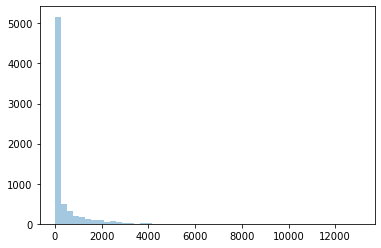

In [35]:
# Regions have different strengths of connections. Hist them
edge_weights = brain_test.flatten()
fig1 = sns.distplot(edge_weights, kde = False)

The mean edge weight is 333.70982726085066.
The median edge weight is 8.0.
The mean edge weight is 553.2916967509025.
The median edge weight is 153.0.


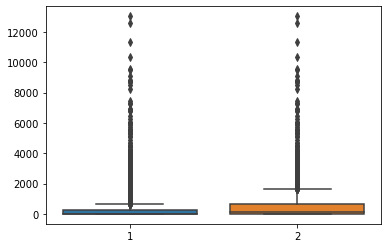

In [36]:
# What is the average edge weight?
mean_edge_weight = edge_weights.mean()
print(f'The mean edge weight is {mean_edge_weight}.')

median_edge_weight = np.median(edge_weights)
print(f'The median edge weight is {median_edge_weight}.')

# That's pretty low. Could be influenced by outlier high edges, or all the 0s.
edge_weights_pos = edge_weights[edge_weights > 0].copy()

mean_edge_weight_pos = edge_weights_pos.mean()
print(f'The mean edge weight is {mean_edge_weight_pos}.')

median_edge_weight_pos = np.median(edge_weights_pos)
print(f'The median edge weight is {median_edge_weight_pos}.')

#fig2 = sns.distplot(edge_weights_pos, kde = False)
fig2 = sns.boxplot(x = [1,2], y= [edge_weights, edge_weights_pos], orient = 'v')

#What do the error bars mean here?

In [37]:
# Read in region coordinates
# data_array = {}
# with h5py.File('coordinatesXYZ.mat', 'r') as f:
# #     for k, v in f.items():
# #         data_array[k] = np.array(v)
#     data_array = {k: np.array(v) for k,v in f.items()}
# x_coord = data_array['X'][0]
# y_coord = data_array['Y'][0]
# z_coord = data_array['Z'][0]

# # What are the dimensions of the x_coord, y_coord, and z_coord arrays?

# # OOORRRRR sio.loadmat('region_coordinates.mat')
# z_coord

In [38]:
# What does this network look like? Use networkx to plot

brain_test_bin = brain_test.copy()
brain_test_bin[brain_test_bin < mean_edge_weight_pos] = 0
G_test = nx.from_numpy_matrix(brain_test_bin)
len(G_test.edges)
np.sum(np.sum(brain_test_bin))

1939227.0

In [39]:
# load in all mats and do random sample to calculate mean edge weight. Can use SE on this.

# can we do this for the degree, too? To show bias in degrees?
G_test1 = nx.from_numpy_array(brain_test,parallel_edges=False)
#G_test1.edges.data('weight', default=1)


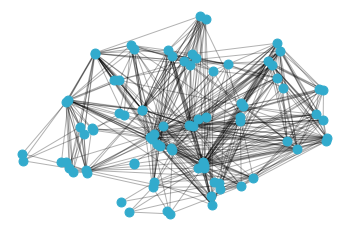

In [22]:
## Docs for numpy for matlab users https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html kinda passive aggressive at times

# Need to assign node locations
for node in G_test.nodes():
    G_test.nodes[node]['pos'] = [y_coord[node][0], z_coord[node][0]]
    

pos=nx.get_node_attributes(G_test,'pos')
nx.draw_networkx_edges(G_test,pos,alpha=0.3)
nx.draw_networkx_nodes(G_test,pos, node_size = 80, node_color = '#32abcd')
plt.axis('off')
plt.show()

In [ ]:
# Now load in allllll the brain mats
os.listdir('./brain_data')

# How many subjects?
print(len(os.listdir('./brain_data')))

n_subjects = len(os.listdir('./brain_data'))

# Create a numpy array to store everything
brain_data_array = np.zeros((n_nodes, n_nodes, n_subjects))

for i,file in enumerate(os.listdir('./brain_data')):
    print(file)
    brain_mat_data = sio.loadmat(f'./brain_data/{file}')
    brain_data_array[:,:,i] = brain_mat_data['adj']
    





In [ ]:
## Practice sampling: what is the average edge weight?


In [ ]:
# Std of the 

In [ ]:
fig = sns.distplot(z_coord)

In [ ]:
coords_other = sio.loadmat('LP_coordinates.mat')

print(coords_other['X'][0:5])
print(x_coord[0:5])

In [ ]:
coords_other['X'].shape